In [2]:
import numpy as np
import pandas as pd
import itertools
import random

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
ar = np.loadtxt('work/hse/applied_stats/week3/failure_times.csv')
ar = np.diff(ar)

In [4]:
ar

array([3.000e+01, 1.130e+02, 8.100e+01, 1.150e+02, 9.000e+00, 2.000e+00,
       9.100e+01, 1.120e+02, 1.500e+01, 1.380e+02, 5.000e+01, 7.700e+01,
       2.400e+01, 1.080e+02, 8.800e+01, 6.700e+02, 1.200e+02, 2.600e+01,
       1.140e+02, 3.250e+02, 5.500e+01, 2.420e+02, 6.800e+01, 4.220e+02,
       1.800e+02, 1.000e+01, 1.146e+03, 6.000e+02, 1.500e+01, 3.600e+01,
       4.000e+00, 0.000e+00, 8.000e+00, 2.270e+02, 6.500e+01, 1.760e+02,
       5.800e+01, 4.570e+02, 3.000e+02, 9.700e+01, 2.630e+02, 4.520e+02,
       2.550e+02, 1.970e+02, 1.930e+02, 6.000e+00, 7.900e+01, 8.160e+02,
       1.351e+03, 1.480e+02, 2.100e+01, 2.330e+02, 1.340e+02, 3.570e+02,
       1.930e+02, 2.360e+02, 3.100e+01, 3.690e+02, 7.480e+02, 0.000e+00,
       2.320e+02, 3.300e+02, 3.650e+02, 1.222e+03, 5.430e+02, 1.000e+01,
       1.600e+01, 5.290e+02, 3.790e+02, 4.400e+01, 1.290e+02, 8.100e+02,
       2.900e+02, 3.000e+02, 5.290e+02, 2.810e+02, 1.600e+02, 8.280e+02,
       1.011e+03, 4.450e+02, 2.960e+02, 1.755e+03, 

In [5]:
stats.ttest_1samp(ar, 500, alternative='greater')

Ttest_1sampResult(statistic=1.7572536270462775, pvalue=0.040579209207804064)

# sign test

In [6]:
np.median(ar), np.mean(ar), ar.size, ar[ar > 500].size

(290.0, 656.8814814814815, 135, 49)

In [29]:

stats.binomtest(ar[ar > 500].size, ar.size, 0.5, alternative='greater')

BinomTestResult(k=49, n=135, alternative='greater', proportion_estimate=0.362962962962963, pvalue=0.9995002578123924)

In [8]:
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [16]:
print("Sign test:", sign_test(ar, mu0=500))

Sign test: (-18.5, 0.0018377911087715663)


In [20]:
1 - 0.0018377911087715663/2

0.9990811044456143

In [10]:
print("Signed rank test:", stats.wilcoxon(ar - 500, alternative='greater'))

Signed rank test: WilcoxonResult(statistic=4091.5, pvalue=0.8632079654217537)


# Permutation test

In [11]:
def permutation_t_stat_1s(sample, mean):
    t_stat = sum(sample - mean)
    return t_stat

def permutation_null_distr_1s(sample, mean, max_permutations = None):
    centered_sample = sample - mean
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [permutation_t_stat_1s(centered_sample * np.array(signs), 0) for signs in signs_array]
    return distr

def permutation_test_1s(sample, mean, max_permutations = None, alternative = 'two-sided', return_distr = False):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1s(sample, mean)
    
    null_distr = permutation_null_distr_1s(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        p = sum([1. if abs(x) >= abs(t_stat) else 0. for x in null_distr]) / len(null_distr)
    elif alternative == 'less':
        p = sum([1. if x <= t_stat else 0. for x in null_distr]) / len(null_distr)
    else: # alternative == 'greater':
        p = sum([1. if x >= t_stat else 0. for x in null_distr]) / len(null_distr)
        
    if return_distr:
        return {'t': t_stat, 'p': p, 'null_distr': null_distr}
    else:
        return {'t': t_stat, 'p': p}

In [33]:
random.seed(0)
res = permutation_test_1s(ar, np.mean(ar), max_permutations=10000, return_distr=True, alternative='greater')
print("Permutation test: t = %f, p = %f" % (res['t'], res['p']))

Permutation test: t = -0.000000, p = 0.497800


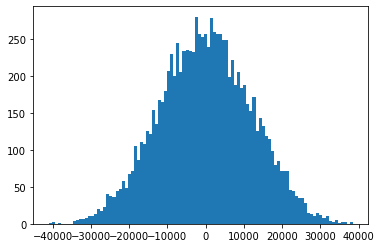

In [13]:
plt.hist(res['null_distr'], bins = 100);